# Project Title : ***Using Dental Metrics to Predict Gender***

In [ ]:
import pandas as pd     # To load the dataset
import numpy as np      # For mathematical operations
import matplotlib.pyplot as plt  # For visualization
import seaborn as sns   # Advanced visualization
from sklearn.preprocessing import LabelEncoder, Normalizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix,roc_curve,auc

In [ ]:
df = pd.read_csv("Dentistry.csv")

In [ ]:
df.fillna(0, inplace=True) # Replace all NaN values with 0

In [ ]:
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])

In [ ]:
X = df.drop(['Gender'], axis=1)  # Features
y = df['Gender'] # Target

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, Normalizer

df = pd.read_csv("Dentistry.csv")

# Replace all NaN values with 0 and ensure it's applied to all columns
for column in df.columns:  # Loop through all columns
    df[column] = df[column].fillna(0)

le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])

X = df.drop(['Gender'], axis=1)  # Features
y = df['Gender'] # Target

# Convert all columns in X to numeric type to avoid potential conflicts
for column in X.columns:
    X[column] = pd.to_numeric(X[column], errors='coerce')  # 'coerce' will set invalid parsing to NaN

# Replace NaN values again after type conversion
X.fillna(0, inplace=True)

normalizer = Normalizer()
X_normalized = normalizer.fit_transform(X)

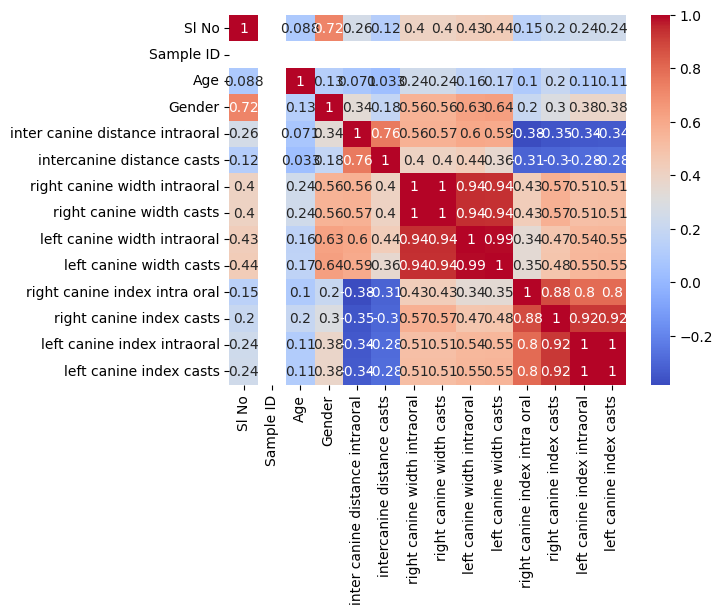

In [ ]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

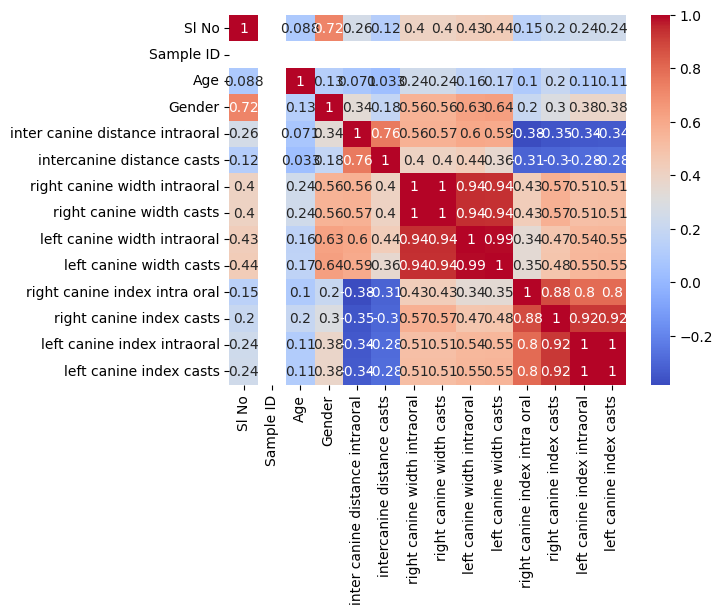

In [ ]:
X_normalized
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, Normalizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split # Import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.read_csv("Dentistry.csv")

# Replace all NaN values with 0 and ensure it's applied to all columns
for column in df.columns:  # Loop through all columns
    df[column] = df[column].fillna(0)

le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])

X = df.drop(['Gender'], axis=1)  # Features
y = df['Gender'] # Target

# Convert all columns in X to numeric type to avoid potential conflicts
for column in X.columns:
    X[column] = pd.to_numeric(X[column], errors='coerce')  # 'coerce' will set invalid parsing to NaN

# Replace NaN values again after type conversion
X.fillna(0, inplace=True)

normalizer = Normalizer()
X_normalized = normalizer.fit_transform(X)


# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42) # Split the data

lr=LogisticRegression()
lr.fit(X_train,y_train) # Now X_train and y_train are defined

LogisticRegression()

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)


RandomForestClassifier()

In [ ]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

[[111   2]
 [  2 105]]


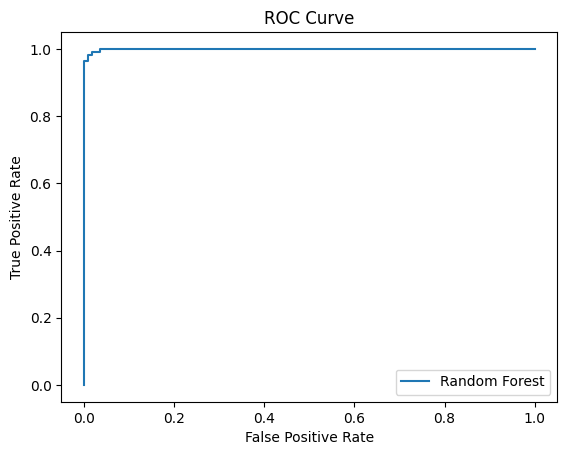

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
y_pred = rf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr, label='Random Forest')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

In [61]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, Normalizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Step 1: Load Dataset
file_path = '/content/Dentistry.csv'  # Update this path to the actual file location
data = pd.read_csv(file_path)

# Step 2: Data Preprocessing
print("First 5 rows of the dataset:")
print(data.head())
print("\nDataset Info:")
print(data.info())
print("\nSummary Statistics:")
print(data.describe())
# Step 3: Handle Missing Values
print("\nChecking for missing values:")
print(data.isnull().sum())
# Replace missing values with mean/mode as appropriate
for column in data.columns:
    if data[column].dtype == 'object':
        data[column].fillna(data[column].mode()[0], inplace=True)
    else:
        data[column].fillna(data[column].mean(), inplace=True)

# Step 4: Encode Categorical Data
label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])  # Encode target variable

# Step 5: Split Independent (X) and Dependent Variables (Y)
X = data.drop(columns=['Gender', 'SampleID', 'SL No.'], errors='ignore')  # Drop non-feature columns
y = data['Gender']




First 5 rows of the dataset:
   Sl No  Sample ID  Age  Gender  inter canine distance intraoral  \
0      1        NaN   24  Female                            25.06   
1      2        NaN   22  Female                            25.78   
2      3        NaN   23  Female                            23.83   
3      4        NaN   20  Female                            26.12   
4      5        NaN   20  Female                            26.36   

   intercanine distance casts  right canine width intraoral  \
0                       25.05                          6.08   
1                       25.79                          6.13   
2                       23.83                          5.91   
3                       26.12                          6.08   
4                       26.41                          6.09   

   right canine width casts  left canine width intraoral  \
0                      6.08                         6.09   
1                      6.13                         6.33 

<ipython-input-61-f637b71fbf8a>:33: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[column].fillna(data[column].mean(), inplace=True)
<ipython-input-61-f637b71fbf8a>:31: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

In [57]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, Normalizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.impute import SimpleImputer # Import SimpleImputer


# Step 1: Load Dataset
file_path = '/content/Dentistry.csv'  # Update this path to the actual file location
data = pd.read_csv(file_path)

# ... (rest of your code remains the same until before Normalization) ...

# Step 5: Split Independent (X) and Dependent Variables (Y)
X = data.drop(columns=['Gender', 'SampleID', 'SL No.'], errors='ignore')  # Drop non-feature columns
y = data['Gender']

# Impute missing values with SimpleImputer before normalization
imputer = SimpleImputer(strategy='mean') # Create an imputer instance
X = imputer.fit_transform(X) # Impute missing values in X

# Normalize Features
normalizer = Normalizer()
X_normalized = normalizer.fit_transform(X)

# ... (rest of your code remains the same) ...

/usr/local/lib/python3.10/dist-packages/sklearn/impute/_base.py:598: UserWarning: Skipping features without any observed values: ['Sample ID']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
